<a href="https://colab.research.google.com/github/pahalvikram/EDA-on-Hotel-Booking/blob/main/EDA_on_Hotel_Booking_Individual_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

In [6]:
hotel_booking_status = '/content/drive/MyDrive/Hotel Bookings.csv'

# **let us read our data first**

In [7]:
df=pd.read_csv(hotel_booking_status)

In [8]:
df.shape

(119390, 32)

In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# First we try to understand the meaning of all columns in the dataframe



In [12]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [13]:
df['is_canceled'].unique()

array([0, 1])

In [14]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [15]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [16]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [17]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [18]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [19]:
df['required_car_parking_spaces'].unique()  

array([0, 1, 2, 8, 3])

**Data cleaning**
# Data cleaning is a mandatory step before starting the EDA project.
While cleaning data we will perform the following steps:1) Handling missing values.2)Remove duplicate rows and columns.3) Adding missing columns

In [20]:
df[df.duplicated()].shape

(31994, 32)

Step 1: Removing duplicate rows.


In [36]:
# Drop these duplicate values
df.drop_duplicates(inplace = True)

In [38]:
df.shape

(87230, 34)

Step2: Handling the missing value.


In [39]:
# Columns having missing values.
df.isnull().sum().sort_values(ascending = False)[:5]

hotel                   0
days_in_waiting_list    0
reserved_room_type      0
assigned_room_type      0
booking_changes         0
dtype: int64

Since company and agent, columns have company numbers and agent numbers as data. There are some  customer they didn't go with any agent or any company. So that in this case values can be null under these columns. We going to replace null values with 0.


In [40]:
df[['company','agent']] = df[['company','agent']].fillna(0)

In [41]:
df['children'].unique()

array([ 0.        ,  1.        ,  2.        , 10.        ,  3.        ,
        0.13890354])

In [42]:
# Checking if all null values are removed
df.isnull().sum().sort_values(ascending = False)[:6]

hotel                   0
days_in_waiting_list    0
reserved_room_type      0
assigned_room_type      0
booking_changes         0
deposit_type            0
dtype: int64

some rows with total number of adults, children or babies equal to zero. So we will remove such rows.



In [43]:
df[df['adults']+df['babies']+df['children'] == 0].shape


(0, 34)

In [51]:
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = True)

 We are going to replace the null values under this children column with 
mean of children.

In [52]:
df['children'].fillna(df['children'].mean(), inplace = True)

Datatype of column has string. We will replacing the missing value with 

*   List item
*   List item

the mode of country column.

In [53]:
df['country'].fillna('others', inplace = True)

**Step 3: Adding missing columns.**

In [54]:
# we are adding total staying days in hotels
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

In [55]:
# And adding total num of people as column 'total_people'.
df['total_people'] = df['adults']+df['children']+df['babies']

In [58]:
num_df = df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

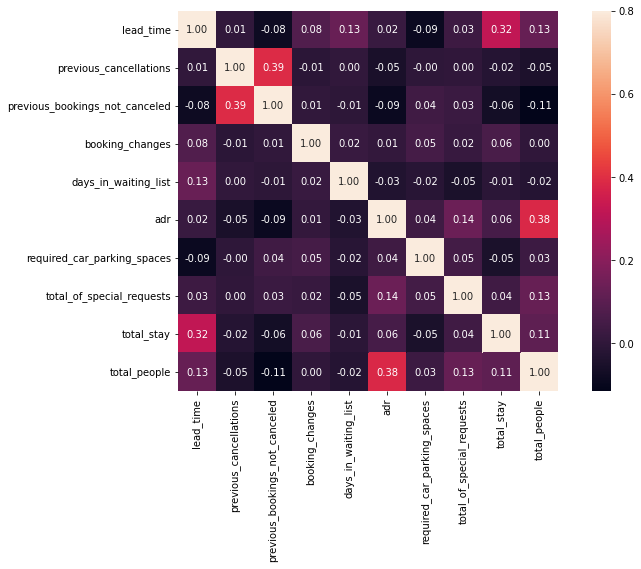

In [59]:
#correlation with matrix
corrmat = num_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

1) adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.     



# New Section